<div align='center' ><font size='20'>Data Visualization</font></div>

# Can male and female athletes achieve equality in sports?
Please execute the cell below, then watch the video.

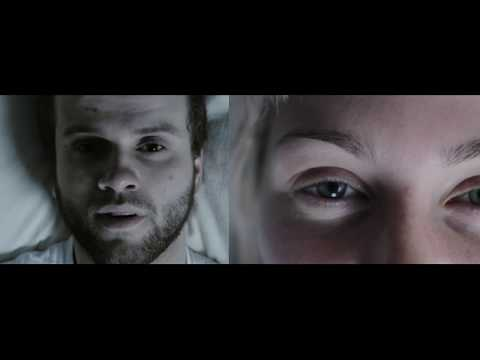

In [14]:
from IPython.display import YouTubeVideo
#Play video
YouTubeVideo('bM_48wruR3Q',width=1000, height=500)

As the video shows, female athletes now perform very well in some sports, but many years ago, they did not have the opportunity to participate in those sports games.

# The History of Olympics
Since the first batch of 22 female athletes participated in the 1900 Paris Olympics, the IOC (International Olympic Committee) has been working hard to achieve gender balance in the Olympics. 

<img src="https://www.bitchmedia.org/sites/default/files/Belle_Moore%2C_Jennie_Fletcher%2C_Annie_Speirs%2C_Irene_Steer_1912.jpg" width="80%">
Swimming was one of the few sports women could compete in at the 1912 Olympic games, where the United Kingdom team (above) took home gold. Frustrated at their exclusion from many Olympic events, female athletes organized their own games from 1922 to 1934. (Photo credit: Creative Commons)

Next, let us explore the Olympic athletes data set and look at the results of the efforts of the IOC over the years!



# Explore dataset and Visualization
## 1. Python environment set-up

This material will be spent in setting-up a python working environment. Follow the instructions provided and make sure your environment is set-up correctly. In case you run into trouble, please seek advice from teachers.

<img src="https://gtimg.tokyo2020.org/image/private/t_article-lead-image-largedesktop-retina/production/tlv5axbnn8jq6hi00uxv" width="80%">

## 2. Dataset

### 2.1 Description

The data is about the basic information of each athlete in each Olympic Games from __Athens 1896__ to __Rio 2016__. 

__Note__ that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four-year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on.

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events).

### 2.2 Classes and Attributes

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

Execute the cell below to import the packages we will be using throughout this material. The last line enforces the matplotlib figures to be rendered within the notebook.

In [16]:
import os
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline

### 2.3 Pandas

Pandas is a library for data manipulation and analysis. There are two fundamental data structures in pandas: the __Series__  and __DataFrame__ structures which are built on top of NumPy arrays. 

Let's start by loading the Olympic dataset into pandas DataFrames.

In [17]:
path = os.path.join(os.getcwd(), 'Desktop', 'dataset', 'athlete_events.csv')
data = pd.read_csv(path, delimiter = ',')

### 2.3.1 Preliminary inspections

We can use the pandas __head( )__ method to inspect the  first __n__ entries in the DataFrame. Note that the last column in the DataFrame contains the label for each data point.

In [18]:
data.head(n=5) #Show fist 5 samples

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


##                 ==================== Question 1 =======================

The pandas __info()__ method provides basic information (i.e. number of rows/columns, variable data types) about a DataFrame. Please display the basic information about the __data__ dataframe. Could you konw how many attributes/samples are there in the dataset?

In [19]:
# Your code goes here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Your answer goes here

There are 271116 entries and 15 columns in the __data__ dataframe.

### 2.4 Seaborn

<img src="https://vrzkj25a871bpq7t1ugcgmn9-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/seaborn-visualization-examples.png" width="80%">

[__Seaborn__](https://seaborn.pydata.org/examples/index.html) is a visualisation library built on top of matplotlib which offers some aesthetic enhancement and, more importantly, provides some high-level functions for  "exploring and understanding data". Seaborn is also tightly integrated with pandas and provides support for both numpy and pandas data structures.

### 3. Visualizing

If you do preliminary analysis of the data, you could find that the number of male athletes is much higher than that of female athletes. Gender differences have been an important topic over years. Therefore, to explore the gender differences, some people choose __Bar Chart__ to visualize the number of female and male athletes over years. There are two common methods to create bar chart: [__countplot__](https://seaborn.pydata.org/generated/seaborn.countplot.html) and [__barplot__](https://seaborn.pydata.org/generated/seaborn.barplot.html).

Considering the big differences in the amount of athletes between summer and winter Olympic Games, in the following visualization, we only select the data of the __Summer__ Olympics.

Make sure you understand what every line of code does in the following cell.

Text(0.5, 0, 'Year')

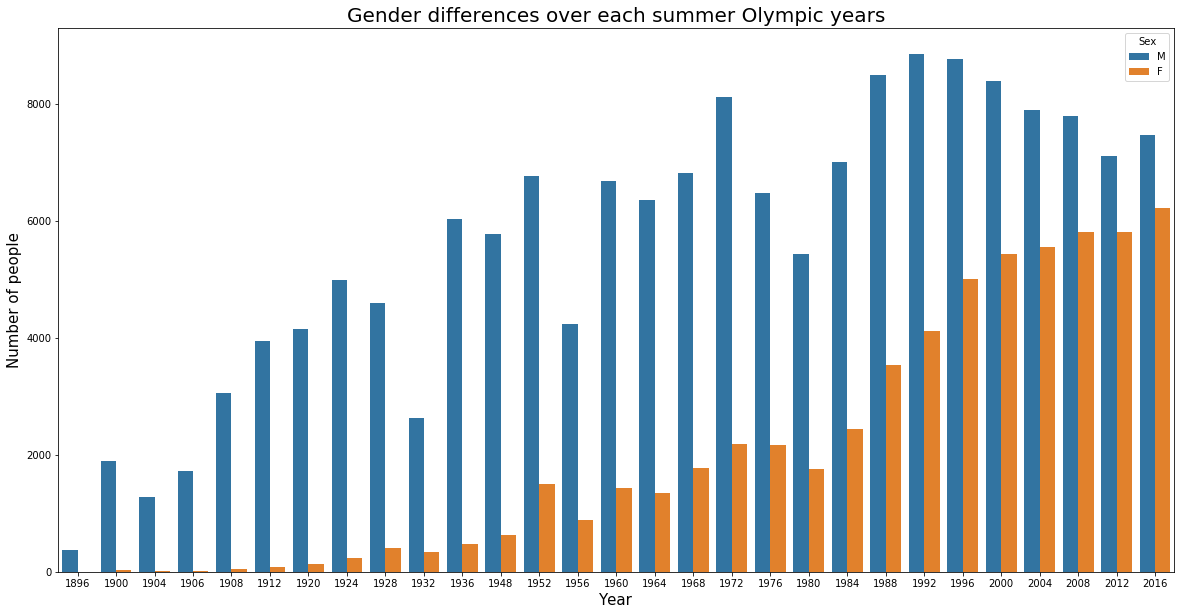

In [20]:
plt.figure(figsize=(20, 10)) # set the figure size 
df=data.loc[data['Season'] == 'Summer'] # Only access the data related to the Summer Olympics
ax = sns.countplot(x="Year", hue="Sex", data=df) # To make it more easier, we choose countplot to realize visualization

ax.set_title('Gender differences over each summer Olympic years', fontsize=20)
ax.set_ylabel('Number of people', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

### ==================== Question 2 =======================

Could you use a bar chart to show the difference between the number of male athletes and female athletes in the __Winter__ Olympics?


Text(0.5, 0, 'Year')

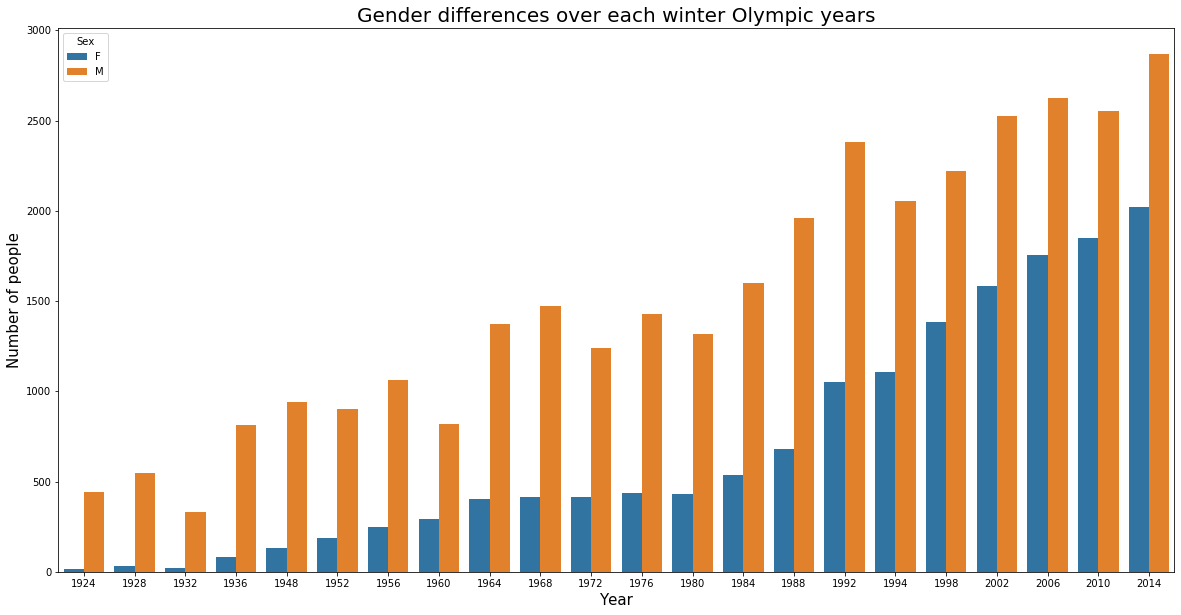

In [21]:
# Your code goes here
plt.figure(figsize=(20, 10)) # set the figure size 
df=data.loc[data['Season'] == 'Winter'] # Only access the data related to the Summer Olympics
ax = sns.countplot(x="Year", hue="Sex", data=df)

ax.set_title('Gender differences over each winter Olympic years', fontsize=20)
ax.set_ylabel('Number of people', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

Obviously, __Line Chart__ ([__lineplot__](https://seaborn.pydata.org/generated/seaborn.lineplot.html)) is another way to show the gender difference. We also just select the data of the Summer Olympics. Once again, make sure you understand what every line of code does in the following cell.

Text(0.5, 0, 'Year')

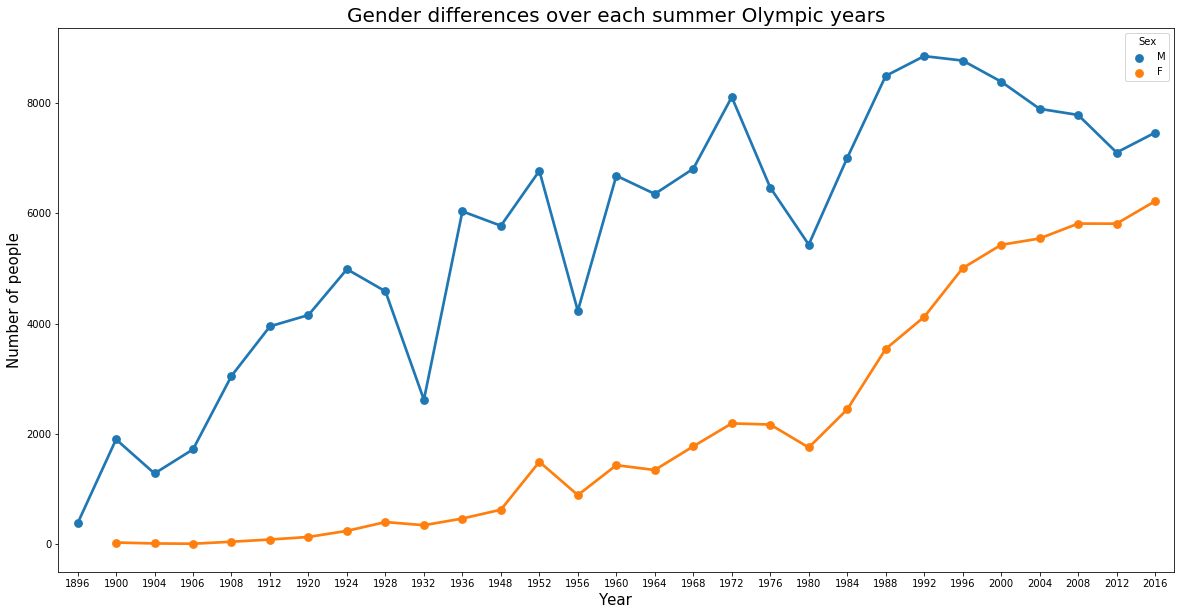

In [22]:
plt.figure(figsize=(20, 10))
df=data.loc[data['Season'] == 'Summer']

#Calculate the total number of male and female athletes each year
count = df.groupby(['Year','Sex']).size().reset_index(name='Count')

#Plot line chart
bx=sns.pointplot(x = 'Year', y = 'Count', hue = 'Sex', data = count)


bx.set_title('Gender differences over each summer Olympic years', fontsize=20)
bx.set_ylabel('Number of people', fontsize=15)
bx.set_xlabel('Year', fontsize=15)

### ==================== Question 3 =======================

Could you visualize the the number of male and female athletes in __swimming__ during __Summer__ Olympics years?


Text(0.5, 0, 'Year')

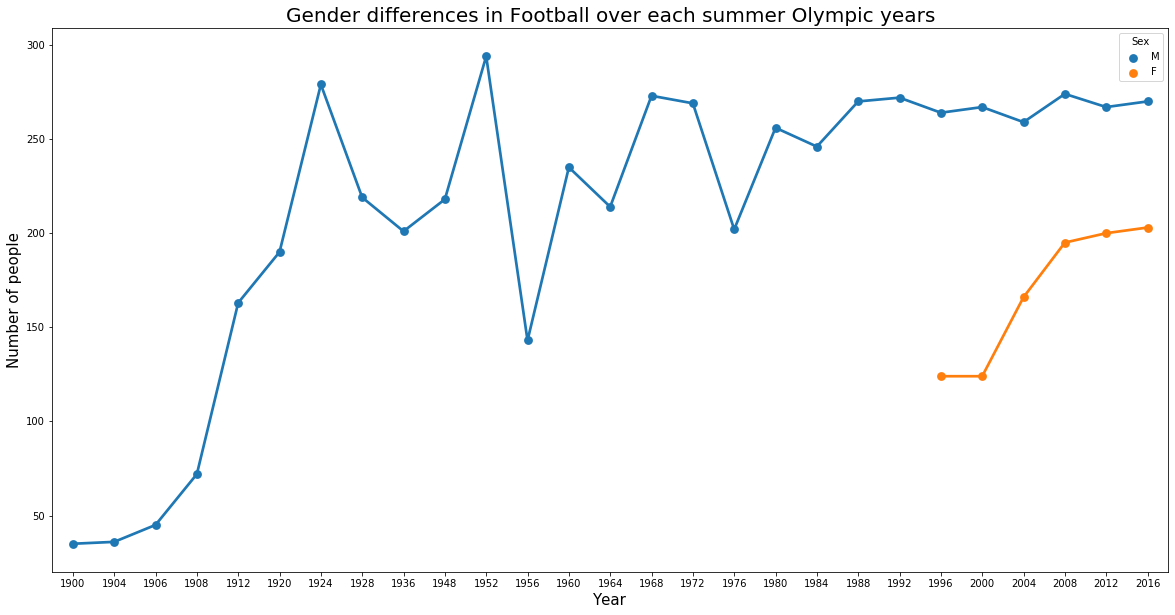

In [23]:
# Your code goes here
plt.figure(figsize=(20, 10))
df=data.loc[data['Season'] == 'Summer']
df_new=df.loc[data['Sport'] == 'Football'] # Access the data of football

#Calculate the total number of male and female athletes each year
count = df_new.groupby(['Year','Sex']).size().reset_index(name='Count')

#Plot line chart
bx=sns.pointplot(x = 'Year', y = 'Count', hue = 'Sex', data = count)


bx.set_title('Gender differences in Football over each summer Olympic years', fontsize=20)
bx.set_ylabel('Number of people', fontsize=15)
bx.set_xlabel('Year', fontsize=15)

### ==================== Question 4 =======================

Now you have learned to use line chart and bar chart to show the number of male atheletes and female atheletes, which kind of way do you think is better to show gender difference over the years? why?

Your answer goes here

I think the line chart is better to show the trend of gender difference among different years. As the year increases, the difference between the total number of male and female athletes is getting smaller.

# The Future

<img src="https://stillmed.olympic.org/media/Images/OlympicOrg/News/2017/06/09/2017-06-09-tokyo2020-thumbnail.jpg?interpolation=lanczos-none&resize=*:*" width="80%">


"Female athletes account for 48.8% of all athletes participating in the 2020 Tokyo Olympics. The Tokyo Olympics will be the first Olympics to achieve gender balance in history," said Thomas Bach, president of the International Olympic Committee.

For the first time ever, there will be at least one male and one female athlete from each of the 206 participating nations plus the IOC Refugee Team. And in another smaller but powerfully ceremonial gesture, each nation now has the option to select both a male and a female flag bearer to lead its athletes into the Opening Ceremony.

Greater gender equality was achieved for 2020 with the addition of more women’s events and also the inclusion of more mixed gender events. Four sports — canoe, rowing, shooting and weightlifting — are now gender balanced for the first time, and an additional two, judo and sailing, are gender balanced in terms of athlete quotas.

However, the Tokyo 2020 Olympics have officially been postponed to no "later than summer 2021" due to the fallout from the global coronavirus pandemic. 

Let’s watch the trailer and look forward to it！

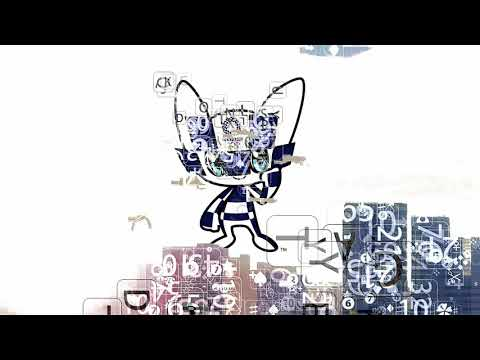

In [24]:
from IPython.display import YouTubeVideo
#Play video
YouTubeVideo('WUCJHVph-mU',width=1000, height=500)